In [1]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats
import pandas as pd
import numpy as np
import scanpy as sc
#import os
#import glob
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd

'/Users/peien/NYU Langone Health Dropbox/Peien Jiang/evolution/new_250522_JE2_timecourse/merged'

In [4]:
expr = pd.read_csv("/Users/peien/NYU Langone Health Dropbox/Peien Jiang/evolution/new_250522_JE2_timecourse/merged/sample_5radata_sum_counts_raw.csv",index_col=0).T
expr = expr[['4r_0.1','4r_0.2','4r_0.3','4r_0.6','4r_0.9','5r_GEN_0h','5r_GEN_6h']]
expr

,4r_0.1,4r_0.2,4r_0.3,4r_0.6,4r_0.9,5r_GEN_0h,5r_GEN_6h
dnaA,1078.0,1914.0,1141.0,879.0,1668.0,434.0,19.0
dnaN,1096.0,1889.0,1372.0,800.0,1801.0,356.0,16.0
SAUSA300_RS00020,119.0,147.0,69.0,57.0,121.0,40.0,8.0
recF,1288.0,1097.0,1122.0,858.0,1404.0,490.0,62.0
gyrB,2699.0,2514.0,3295.0,2383.0,3676.0,1109.0,139.0
...,...,...,...,...,...,...,...
SAUSA300_RS15490,41.0,149.0,34.0,23.0,25.0,9.0,0.0
SAUSA300_RS15635,238.0,377.0,29.0,10.0,11.0,9.0,0.0
SAUSA300_RS15735,19.0,19.0,2.0,2.0,3.0,1070.0,0.0
SAUSA300_RS15740,14.0,24.0,7.0,2.0,0.0,615.0,0.0


In [5]:
metadata = pd.DataFrame({'condition': ['4r_0.1','4r_0.2','4r_0.3','4r_0.6','4r_0.9','5r_GEN_0h','5r_GEN_6h']},
                       index=['4r_0.1', '4r_0.2', '4r_0.3', '4r_0.6', '4r_0.9', '5r_GEN_0h', '5r_GEN_6h'])
metadata

,condition
4r_0.1,4r_0.1
4r_0.2,4r_0.2
4r_0.3,4r_0.3
4r_0.6,4r_0.6
4r_0.9,4r_0.9
5r_GEN_0h,5r_GEN_0h
5r_GEN_6h,5r_GEN_6h


In [6]:
inference = DefaultInference(n_cpus=8)
dds = DeseqDataSet(
    counts=expr.transpose(),
    metadata=metadata,
    design_factors="condition",
    refit_cooks=True,
    inference=inference,
    # n_cpus=8, # n_cpus can be specified here or in the inference object
)
dds

/Users/peien/opt/anaconda3/envs/pydeseq2/lib/python3.8/site-packages/pydeseq2/dds.py:250: UserWarning: Some factor levels in the design contain underscores ('_').
                    They will be converted to hyphens ('-').
  self.obsm["design_matrix"] = build_design_matrix(


AnnData object with n_obs × n_vars = 7 × 2284
    obs: 'condition'
    obsm: 'design_matrix'

In [7]:
dds.fit_size_factors()

dds.obsm["size_factors"]

Fitting size factors...
... done in 0.01 seconds.



array([4.5146797 , 4.50066085, 1.94124429, 1.33499513, 2.01659866,
       0.40630322, 0.02395181])

In [8]:
dds.deseq2() #It's able to get the size factor and normalized counts although with an error

Fitting size factors...
... done in 0.00 seconds.



ValueError: The number of samples and the number of design variables are equal, i.e., there are no replicates to estimate the dispersion. Please use a design with fewer variables.

In [9]:
dds

AnnData object with n_obs × n_vars = 7 × 2284
    obs: 'condition'
    obsm: 'design_matrix', 'size_factors'
    varm: 'non_zero'
    layers: 'normed_counts'

In [10]:
exp = pd.DataFrame(dds.layers['normed_counts'], 
                    index=['4r_0.1', '4r_0.2', '4r_0.3', '4r_0.6', '4r_0.9', '5r_GEN_0h', '5r_GEN_6h'],
                      columns=expr.index)
exp

,dnaA,dnaN,SAUSA300_RS00020,recF,gyrB,gyrA,nnrD,hutH,serS,SAUSA300_RS00055,...,tmRNA,SAUSA300_RS15260,SAUSA300_RS15340,SAUSA300_RS15370,epiG,SAUSA300_RS15490,SAUSA300_RS15635,SAUSA300_RS15735,SAUSA300_RS15740,SAUSA300_RS15795
4r_0.1,238.776629,242.763623,26.358459,285.291557,597.827571,604.915560,877.803136,45.850429,147.297271,17.498473,...,2036.467837,16.169475,1670.993404,530.934675,61.355405,9.081486,52.716918,4.208493,3.100995,9.967485
4r_0.2,425.270880,419.716140,32.661870,243.741983,558.584635,663.680312,389.053976,71.989428,193.082756,26.884941,...,3020.889698,23.329907,2127.020968,585.247386,55.769588,33.106249,83.765476,4.221602,5.332550,25.107424
4r_0.3,587.767343,706.763185,35.544213,577.979806,1697.364938,2149.652166,107.147772,24.726409,364.714530,25.756676,...,3010.440273,26.786943,2716.814169,194.720469,23.696142,17.514540,14.938872,1.030267,3.605935,12.878338
4r_0.6,658.429369,599.253123,42.696785,642.698975,1785.025241,2007.497963,77.902906,17.977594,382.772932,38.202387,...,1585.024511,23.221059,2528.848180,104.869297,18.726660,17.228527,7.490664,1.498133,1.498133,12.734129
4r_0.9,827.135332,893.087970,60.002023,696.221826,1822.871392,1790.143015,51.571987,8.925921,480.016188,71.903251,...,2737.778279,8.925921,2418.428666,740.355546,27.273647,12.397112,5.454729,1.487653,0.000000,8.430036
5r_GEN_0h,1068.167759,876.192909,98.448641,1205.995857,2729.488583,2301.236993,36.918241,135.366882,61.530401,7.383648,...,14471.950288,34.457024,7386.109322,27627.149996,940.184525,22.150944,22.150944,2633.501158,1513.647862,46.763105
5r_GEN_6h,793.259578,668.008065,334.004033,2588.531254,5803.320069,5051.810995,41.750504,375.754537,41.750504,0.000000,...,36364.689064,41.750504,9894.869470,82039.740539,7181.086704,0.000000,0.000000,0.000000,0.000000,83.501008


In [12]:
pwd

'/Users/peien/NYU Langone Health Dropbox/Peien Jiang/evolution/new_250522_JE2_timecourse/merged'

In [13]:
exp.to_csv("/Users/peien/NYU Langone Health Dropbox/Peien Jiang/evolution/new_250522_JE2_timecourse/merged/deseq2_5r.csv")

In [14]:
exp = pd.read_csv("/Users/peien/NYU Langone Health Dropbox/Peien Jiang/evolution/new_250522_JE2_timecourse/merged/deseq2_5r.csv", index_col=0)
exp

,dnaA,dnaN,SAUSA300_RS00020,recF,gyrB,gyrA,nnrD,hutH,serS,SAUSA300_RS00055,...,tmRNA,SAUSA300_RS15260,SAUSA300_RS15340,SAUSA300_RS15370,epiG,SAUSA300_RS15490,SAUSA300_RS15635,SAUSA300_RS15735,SAUSA300_RS15740,SAUSA300_RS15795
4r_0.1,238.776629,242.763623,26.358459,285.291557,597.827571,604.915560,877.803136,45.850429,147.297271,17.498473,...,2036.467837,16.169475,1670.993404,530.934675,61.355405,9.081486,52.716918,4.208493,3.100995,9.967485
4r_0.2,425.270880,419.716140,32.661870,243.741983,558.584635,663.680312,389.053976,71.989428,193.082756,26.884941,...,3020.889698,23.329907,2127.020968,585.247386,55.769588,33.106249,83.765476,4.221602,5.332550,25.107424
4r_0.3,587.767343,706.763185,35.544213,577.979806,1697.364938,2149.652166,107.147772,24.726409,364.714530,25.756676,...,3010.440273,26.786943,2716.814169,194.720469,23.696142,17.514540,14.938872,1.030267,3.605935,12.878338
4r_0.6,658.429369,599.253123,42.696785,642.698975,1785.025241,2007.497963,77.902906,17.977594,382.772932,38.202387,...,1585.024511,23.221059,2528.848180,104.869297,18.726660,17.228527,7.490664,1.498133,1.498133,12.734129
4r_0.9,827.135332,893.087970,60.002023,696.221826,1822.871392,1790.143015,51.571987,8.925921,480.016188,71.903251,...,2737.778279,8.925921,2418.428666,740.355546,27.273647,12.397112,5.454729,1.487653,0.000000,8.430036
5r_GEN_0h,1068.167759,876.192909,98.448641,1205.995857,2729.488583,2301.236993,36.918241,135.366882,61.530401,7.383648,...,14471.950288,34.457024,7386.109322,27627.149996,940.184525,22.150944,22.150944,2633.501158,1513.647862,46.763105
5r_GEN_6h,793.259578,668.008065,334.004033,2588.531254,5803.320069,5051.810995,41.750504,375.754537,41.750504,0.000000,...,36364.689064,41.750504,9894.869470,82039.740539,7181.086704,0.000000,0.000000,0.000000,0.000000,83.501008


In [15]:
exp_logscaled = np.log2(exp+1).apply(lambda x: (x - np.mean(x)) / np.std(x), 0)
exp_logscaled

,dnaA,dnaN,SAUSA300_RS00020,recF,gyrB,gyrA,nnrD,hutH,serS,SAUSA300_RS00055,...,tmRNA,SAUSA300_RS15260,SAUSA300_RS15340,SAUSA300_RS15370,epiG,SAUSA300_RS15490,SAUSA300_RS15635,SAUSA300_RS15735,SAUSA300_RS15740,SAUSA300_RS15795
4r_0.1,-1.991324,-2.043561,-0.990046,-1.121997,-1.309448,-1.474853,1.843601,-0.067372,-0.196303,0.088821,...,-0.757551,-0.723553,-1.095246,-0.416595,-0.311382,-0.162507,0.995830,-0.124948,-0.192864,-0.878310
4r_0.2,-0.741577,-0.764253,-0.731731,-1.331129,-1.398585,-1.340208,1.110572,0.318812,0.113922,0.404970,...,-0.389075,0.056408,-0.707972,-0.374924,-0.356851,0.970286,1.328868,-0.123931,-0.006308,0.258686
4r_0.3,-0.040089,0.455028,-0.629375,-0.182730,0.061491,0.367810,-0.047065,-0.589517,0.844407,0.373153,...,-0.392314,0.353692,-0.315142,-0.845148,-0.760115,0.402464,0.108797,-0.505983,-0.143006,-0.569712
4r_0.6,0.206104,0.068821,-0.406676,-0.041406,0.127677,0.268339,-0.331586,-0.854542,0.899978,0.667390,...,-0.991697,0.046374,-0.430226,-1.108530,-0.868967,0.387993,-0.351008,-0.422111,-0.405703,-0.583406
4r_0.9,0.700909,1.002829,0.008983,0.065120,0.155253,0.101739,-0.698007,-1.419077,1.160376,1.145309,...,-0.481032,-1.949710,-0.501888,-0.274309,-0.694572,0.101771,-0.551165,-0.423812,-0.798822,-1.076315
5r_GEN_0h,1.255788,0.958111,0.617875,0.797036,0.685927,0.466883,-0.992880,0.863248,-1.191969,-0.520835,...,1.075197,0.899114,1.290488,1.276500,1.003655,0.610176,0.381320,2.393182,2.345524,1.050564
5r_GEN_6h,0.610189,0.323025,2.130969,1.815105,1.677685,1.610289,-0.884634,1.748448,-1.630411,-2.158809,...,1.936472,1.317675,1.759986,1.743006,1.988232,-2.310184,-1.912643,-0.792397,-0.798822,1.798494


In [16]:
markers = ['groES','groEL','grpE','clpB','clpC','dnaJ','dnaK','hrcA','smpB',]

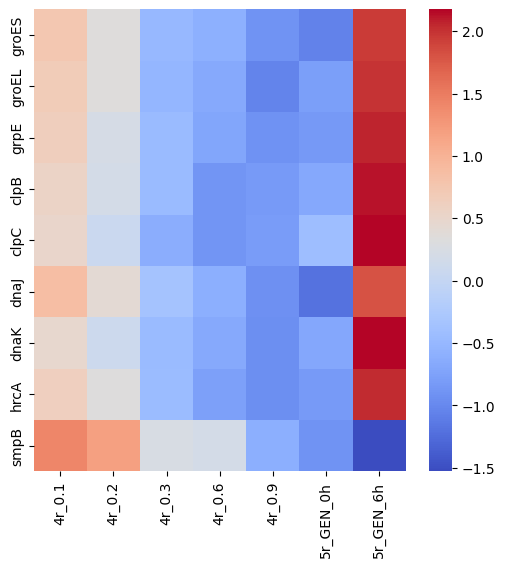

In [19]:
plt.figure(figsize=(6,6))
sns.heatmap(exp_logscaled[markers].T, cmap='coolwarm')
plt.savefig("deseq2_5r_marker_heatmap.pdf")